## SVM implementation with iris dataset

Accuracy: 0.8


C:\Users\neeth\AppData\Local\Temp\ipykernel_30016\2379215370.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


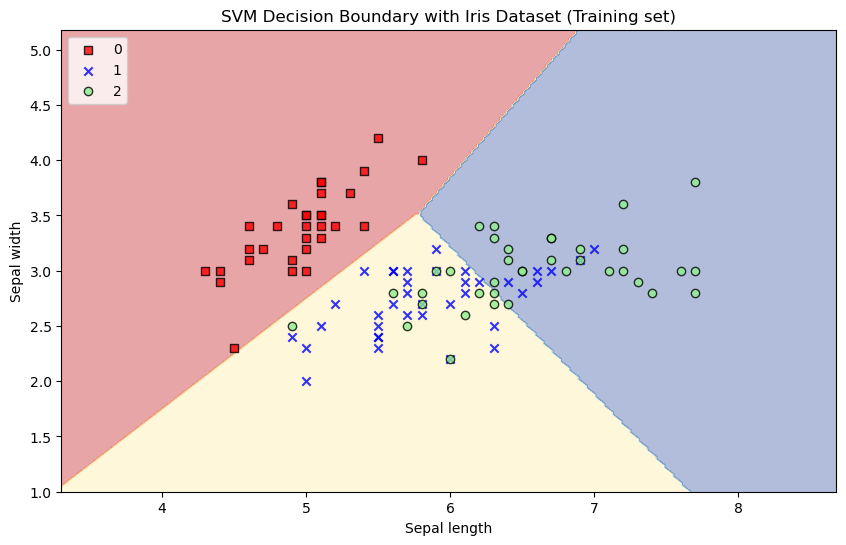

In [1]:
# Import the necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for easy visualization
y = iris.target

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement an SVM classifier and train it on the training subset
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Evaluate the classifier on the testing subset and print the accuracy
y_pred = svm_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the decision boundaries
def plot_decision_boundaries(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

# Plotting the decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_boundaries(X_train, y_train, classifier=svm_clf)
plt.title('SVM Decision Boundary with Iris Dataset (Training set)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='upper left')
plt.show()
